### 2) 다항회귀(Polynomial Regression)
데이터가 단순 직선 형태가 아닌 비선형 형태를 갖고 있을 때, 각 변수의 거듭제곱을 새로운 변수로 추가하여 확장된 특성을 데이터셋에 선형모델로 훈련시키는 기법을 다항회귀라고 한다.

- scikit-learn : PolynomialFeatures

In [4]:
# https://www.kaggle.com/datasets/crawford/80-cereals
import pandas as pd
data=pd.read_csv('./data/cereal.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
# 설탕함유량에 따른 영양등급평가 예측
# 분석에 필요한 데이터만 추출 (name, mfr, type 변수 제외)
data=data[data.columns[3:]]
# 설탕함유량(sugars)이 0이상인 데이터만 추출
data=data[data['sugars']>=0]
data.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


C:\Users\heo\AppData\Local\Temp\ipykernel_17832\290663307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace=True)


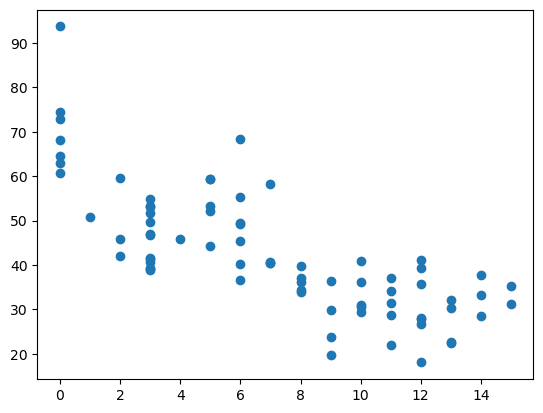

In [6]:
import matplotlib.pyplot as plt
cereal2=data[['sugars','rating']]
cereal2.sort_values(by=['sugars'], inplace=True)
cereal2.reset_index(drop=True, inplace=True)
x=cereal2['sugars'].values
y=cereal2['rating'].values
plt.scatter(x,y)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [9]:
import numpy as np
x_test_poly=poly_reg.transform(x_test.reshape(-1,1))
pred=reg.predict(x_test_poly)

np.set_printoptions(precision=2)   # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred),1),
                      y_test.reshape(len(y_test),1)),
                      1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [12]:
# 회귀분석 성능평가지표 : 모델 예측력 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_test, pred)
mae=mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc=reg.score(poly_reg.transform(x_test.reshape(-1,1)), y_test)

print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}'.format(round(acc,3)))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	0.744


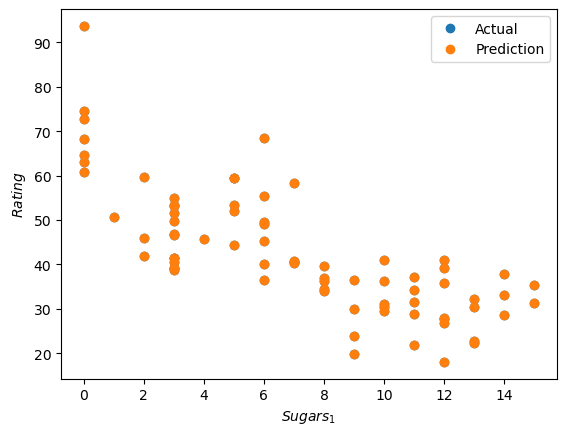

In [14]:
# 다항회귀분석 시각화
x_new=np.linspace(0,15,100).reshape(100,1)
x_new_poly=poly_reg.transform(x_new)
y_new=reg.predict(x_new_poly)

plt.plot(x,y,'o',label='Actual')
plt.plot(x,y,'o',label='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

- 고차다항회귀

In [18]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(53, 12) (23, 12)
(53,) (23,)


In [20]:
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
x_train_ssc=ssc.fit_transform(x_train)
x_test_ssc=ssc.fit_transform(x_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
x_poly = poly_reg.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_poly,y_train)

LinearRegression()

In [22]:
import numpy as np
x_test_poly=poly_reg.transform(x_test)
pred=reg.predict(x_test_poly)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_test, pred)
mae=mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc=reg.score(poly_reg.transform(x_test), y_test)

print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}'.format(round(acc,3)))

MSE	26.061
MAE	2.51
RMSE	5.105
ACC	0.8


### 3) 다중회귀(Multiple Regression)
여러개 독립변수가 복합적으로 종속변수에 영향을 미치는 경우 사용한다. 모델이 복잡해지면 과대적합 발생 가능성이 있어 다양한 규제를 적용해 모델 가중치를 제한한다.

##### 3-1) 변수선택법
- 규제가 있는 다항회귀모델(릿지, 라소) : 계수추정치 제한/규칙화하는 기법(회귀계수 0으로 수축하기 위한 방식)

<b><팁></b> 릿지회귀가 최소제곱법보다 나은 이유는 편향-분산 트레이드오프 관점에서 살펴볼수 있다. 알파가 증가하면 릿지회귀 적합의 유연성은 줄어들어 편향은 증가하지만 분산은 감소한다 -> 학습데이터의 작은 변화에 회귀계수 추정치가 크게 변하는 문제를 극복할 수 있다.

In [23]:
# Ridge
from sklearn.datasets import load_diabetes   # 당뇨데이터
import pandas as pd

data=load_diabetes()
x=pd.DataFrame(data.data, columns=data.feature_names)
y=data.target

x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [25]:
from sklearn.linear_model import Ridge

# RidgeMSE alpha값에 따라 다르게 설정되는 릿지회귀계수를 df에 저장하여 출력
alpha=np.logspace(-3,1,5)

data=[]
for i,a in enumerate(alpha):
    ridge=Ridge(alpha=a)
    ridge.fit(x,y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge=pd.DataFrame(data, index=alpha)
df_ridge.columns=x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


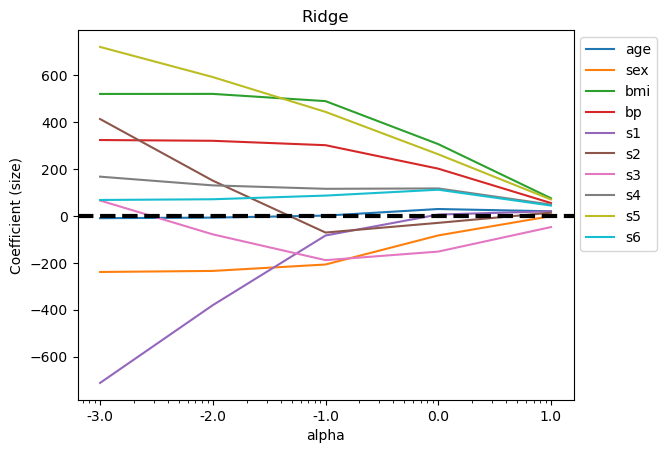

In [48]:
# alpha값이 증가하면서 회귀계수 값이 0에 수렵하는지 시각화
plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1,1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

# 알파값이 점점 증가하면서 회귀계수가 0에 가까워지는 것을 확인할 수 있다.

In [ ]:
# MSE를 사용한 회귀모델과 비교 (alpha=0일때와 같은 효과)
# 179p